In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## display data

In [2]:
df = pd.read_csv("./input_data/classification.csv")
df.head()

,true,pred
0,1,0
1,1,1
2,1,1
3,0,0
4,1,1


## error matrix

<br>TP = <pred, true> 
<br>FP = <pred, (1 - true)>
<br>FN = <(1 - pred), true> 
<br>TN = <(1 - pred), (1 - true)>

In [3]:
TP = np.dot(df["true"], df["pred"])
FP = np.dot((1 - df["true"]), df["pred"])
FN = np.dot(df["true"], (1 - df["pred"]))
TN = np.dot((1 - df["true"]), (1 - df["pred"]))

err_arr = [TP, FP, FN, TN]

## check the number of entries

In [4]:
len(df) - np.sum(err_arr)

0

In [5]:
w = open("./task_3/error_matrix.dat", "w")
w.write(" ".join([f"{x}" for x in err_arr]))
w.close()

## compute accuracy, precision, recall, f1_score
using sklearn and compare with homemade

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [7]:
accuracy = accuracy_score(df["true"], df["pred"])
precision = precision_score(df["true"], df["pred"])
recall = recall_score(df["true"], df["pred"])
f1 = f1_score(df["true"], df["pred"])

arr_metrics = [accuracy, precision, recall, f1]

In [8]:
accur = (TP + TN) / np.sum(err_arr)
prec = TP / (TP + FP)
rec = TP / (TP + FN)
f1_home = 2 * prec * rec / (prec + rec)

metrics_home = [accur, prec, rec, f1_home]

In [9]:
np.array(metrics_home) - np.array(arr_metrics)

array([0., 0., 0., 0.])

In [10]:
w = open("./task_3/metrics.dat", "w")
w.write(" ".join([f"{np.round(x, 2)}" for x in arr_metrics]))
w.close()

## compare four different classification models

In [11]:
df_scores = pd.read_csv("./input_data/scores.csv")
df_scores.head()

,true,score_logreg,score_svm,score_knn,score_tree
0,0,0.683832,0.145976,0.787063,0.500000
1,1,0.801966,0.239511,1.000000,0.833333
2,0,0.382315,-0.245701,0.000000,0.000000
3,1,0.506797,-0.137058,0.000000,0.105263
4,1,0.488781,-0.154148,0.000000,0.105263


In [12]:
from sklearn.metrics import roc_auc_score

In [13]:
roc_log = roc_auc_score(df_scores["true"], df_scores["score_logreg"])
roc_svm = roc_auc_score(df_scores["true"], df_scores["score_svm"])
roc_knn = roc_auc_score(df_scores["true"], df_scores["score_knn"])
roc_tree = roc_auc_score(df_scores["true"], df_scores["score_tree"])

arr_scores = [roc_log, roc_svm, roc_knn, roc_tree]
arr_scores

# logistic regression has the best score here

[0.719187675070028, 0.7086834733893557, 0.6351540616246498, 0.6919267707082833]

In [14]:
w = open("./task_3/best_classifier.dat", "w")
w.write("score_logreg")
w.close()

## best precision with recall > 70%

In [15]:
from sklearn.metrics import precision_recall_curve

In [16]:
precision1, recall1, thresholds1 = precision_recall_curve(df_scores["true"], df_scores["score_logreg"])
precision2, recall2, thresholds2 = precision_recall_curve(df_scores["true"], df_scores["score_svm"])
precision3, recall3, thresholds3 = precision_recall_curve(df_scores["true"], df_scores["score_knn"])
precision4, recall4, thresholds4 = precision_recall_curve(df_scores["true"], df_scores["score_tree"])

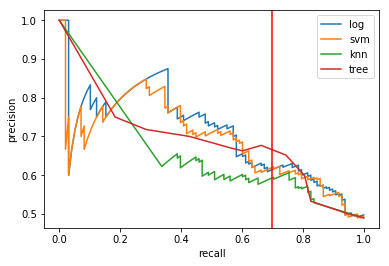

In [17]:
plt.plot(recall1, precision1, label="log")
plt.plot(recall2, precision2, label="svm")
plt.plot(recall3, precision3, label="knn")
plt.plot(recall4, precision4, label="tree")
plt.axvline(0.7, c="red")

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend()

In [18]:
def find_max_precision(classifier, df_scores = df_scores, level = 0.7):
    
    precision, recall, thresholds = precision_recall_curve(df_scores["true"], df_scores[classifier])
    df = pd.DataFrame({"recall":recall, "precision":precision})
    return df[df["recall"].gt(0.7)]['precision'].max()

In [19]:
tmp = ["score_logreg", "score_svm", "score_knn", "score_tree"]
prec_arr = [find_max_precision(clf) for clf in tmp]

In [20]:
w = open("./week3/best_precision.dat", "w")
#w.write(f"{np.round(np.max(prec_arr), 2)}")
w.write("score_tree")
w.close()